# Decision Tree

## 1.Environment Setup

In [25]:
import os
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

warnings.filterwarnings('ignore')

# Đặt seed để đảm bảo kết quả nhất quán giữa các lần chạy
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)
random.seed(SEED)
print(f"Seed: {SEED}")


Seed: 42


## 2.Data Processing

In [2]:
# https://drive.google.com/file/d/1T6AWCoyeC2MqGvmqZPPcA4ni5Md1k0sI/view?usp=sharing
!gdown 1T6AWCoyeC2MqGvmqZPPcA4ni5Md1k0sI


Downloading...
From: https://drive.google.com/uc?id=1T6AWCoyeC2MqGvmqZPPcA4ni5Md1k0sI
To: /home/banhmuy/data-science-artificial-intelligence-projects/Heart-Disease-Diagnosis/notebooks/dataset.zip
100%|███████████████████████████████████████| 21.1k/21.1k [00:00<00:00, 266kB/s]


In [3]:
!unzip dataset.zip


Archive:  dataset.zip
  inflating: splits/fe_train.csv     
  inflating: splits/raw_test.csv     
  inflating: splits/raw_val.csv      
  inflating: splits/fe_test.csv      
  inflating: splits/fe_val.csv       
  inflating: splits/fe_feature_names.json  
  inflating: splits/raw_train.csv    


In [4]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    display(df.head())

    X = df.drop('target', axis=1)
    y = df['target']
    display(y.value_counts())

    print("Shape df: ", df.shape)
    print("Shape X: ", X.shape)
    print("Shape y: ", y.shape)

    return X, y


### 2.1 Original Dataset

In [5]:
X_train, y_train = read_csv('splits/raw_train.csv')

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-0.729485,-0.395692,0.458139,0.708371,-0.445445,1.0,1.000000,0.0,1.0,0.0,0.5,0.000000,1.0,1
1,0.050166,-0.054513,0.230598,0.222495,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,-0.061212,0.059213,0.723605,0.399178,-0.891627,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0,0
3,-0.061212,-1.305501,1.121803,0.266666,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0,0
4,0.272924,0.514117,-0.167601,-1.190962,-0.713154,0.0,1.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


In [6]:
X_val, y_val = read_csv('splits/raw_val.csv')

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-1.063621,0.400391,-0.262410,0.089984,-0.713154,0.0,1.000000,0.0,1.0,1.0,0.5,0.0,0.0,0
1,1.720848,-0.054513,1.368307,-1.809349,1.250048,1.0,1.000000,0.0,1.0,0.0,0.5,1.0,0.0,1
2,-0.061212,1.082748,-0.338257,0.664201,0.536156,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.941197,0.229802,0.040979,0.973394,-0.891627,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.495681,0.229802,-0.300333,0.487519,-0.445445,1.0,1.000000,0.0,0.0,0.0,0.5,0.0,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


In [7]:
X_test, y_test = read_csv('splits/raw_test.csv')


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.384303,-0.168240,-0.641646,-0.837597,1.071575,1.0,1.000000,0.0,1.0,1.0,0.5,1.0,1.0,1
1,-2.288787,-0.736870,-1.286348,1.061736,-0.891627,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.829818,-0.054513,-0.357219,-0.175039,0.714629,1.0,0.666667,0.0,0.0,0.0,0.5,1.0,1.0,0
3,-0.395349,-0.054513,0.116827,-0.042528,-0.445445,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-1.397757,-0.623144,-0.186562,1.945146,-0.177735,1.0,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


### 2.2 Feature Engineering Dataset

In [8]:
X_train_fe, y_train_fe = read_csv('splits/fe_train.csv')


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,0.0,0
3,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,1.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,0.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


In [9]:
X_val_fe, y_val_fe = read_csv('splits/fe_val.csv')


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,1.0,0.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.262410,1.0,0.089984,0.628019,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.250048,0.0,1.368307,1.0,-1.809349,-1.592443,1.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.536156,1.0,-0.338257,0.0,0.664201,0.235034,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.040979,0.0,0.973394,-0.161823,0.0,0
4,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,-0.300333,1.0,0.487519,-0.163464,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


In [10]:
X_test_fe, y_test_fe = read_csv('splits/fe_test.csv')


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,0.0,1.0,0.0,1.071575,0.0,-0.641646,1.0,-0.837597,-0.736915,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,-1.286348,0.0,1.061736,2.749978,1.0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.714629,0.0,-0.357219,1.0,-0.175039,-0.619566,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.445445,1.0,0.116827,0.0,-0.042528,0.071622,0.0,0
4,0.0,1.0,0.0,1.0,0.0,1.0,-0.177735,0.0,-0.186562,0.0,1.945146,2.141882,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


## 3. Decision Tree

In [28]:
def find_optimal_depth(X_train, y_train, depth_range=range(1, 11), cv_splits=5, min_depth=2):
    # Create a cross-validation splitter dataset
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    depth_scores = []

    # Eval by cross-validation on train
    for depth in range(min_depth, depth_range.stop):
        dt = DecisionTreeClassifier(max_depth=depth, random_state=SEED)
        cv_score = cross_val_score(
            dt, X_train, y_train,
            cv=cv, scoring="accuracy", n_jobs=-1
        )
        depth_scores.append(cv_score.mean())
    #Draw graph chosse k follow CV
    plt.figure(figsize=(10, 6))
    plt.plot(list(range(min_depth, depth_range.stop)), depth_scores, "bo-")
    plt.title(f"Choose optimal Depth for DT (CV={cv_splits}-fold)")
    plt.xlabel("Max Depth")
    plt.ylabel("CV Accuracy")
    plt.grid(True)
    plt.show()

    # Optimal K
    optimal_depth = list(
        range(min_depth, depth_range.stop)
        )[int(np.argmax(depth_scores))]

    print(f"Optimal Depth: {optimal_depth} with CV Accuracy: {max(depth_scores):.4f}")
    return optimal_depth

def evaluate_val(X_train, y_train, X_val, y_val, optimal_depth):
    # Train the model with optimal depth
    dt = DecisionTreeClassifier(max_depth=optimal_depth, random_state=SEED)
    dt.fit(X_train, y_train)

    # Predict and evaluate on validation set
    dt_pred = dt.predict(X_val)
    val_accuracy = accuracy_score(y_val, dt_pred)
    print(f"Validation Accuracy with optimal depth: {val_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, dt_pred))
    return dt, val_accuracy


def evaluate_test(dt_model, X_test, y_test):
    # Predict and evaluate on test data
    dt_test_pred = dt_model.predict(X_test)
    dt_test_accuracy = accuracy_score(y_test, dt_test_pred)

    print(f"\nTest Accuracy of Decision Tree: {dt_test_accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, dt_test_pred))
    return dt_test_accuracy

def display_feature_importance(dt_model, X_train):
     # Display the most influential features
    feature_importance = pd.DataFrame({
        "feature": X_train.columns,
        "importance": dt_model.feature_importances_
    }).sort_values("importance", ascending=False)
    print("\nFeature Importance Ranking:")
    display(feature_importance.head(10))


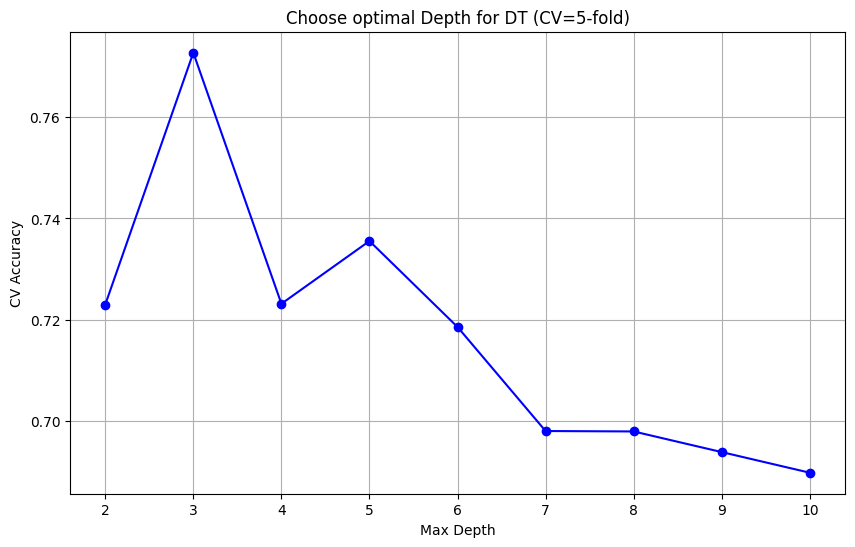

Optimal Depth: 3 with CV Accuracy: 0.7728
Validation Accuracy with optimal depth: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Test Accuracy of Decision Tree: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31


Feature Importance Ranking:


,feature,importance
12,thal,0.536927
6,cp,0.194140
11,ca,0.168773
4,oldpeak,0.066853
0,age,0.033307
3,thalach,0.000000
2,chol,0.000000
1,trestbps,0.000000
5,sex,0.000000
8,restecg,0.000000


In [29]:
depth_optimal = find_optimal_depth(X_train, y_train)
model, accuracy = evaluate_val(X_train, y_train, X_val, y_val, depth_optimal)
test_accuracy = evaluate_test(model, X_test, y_test)
display_feature_importance(model, X_train)

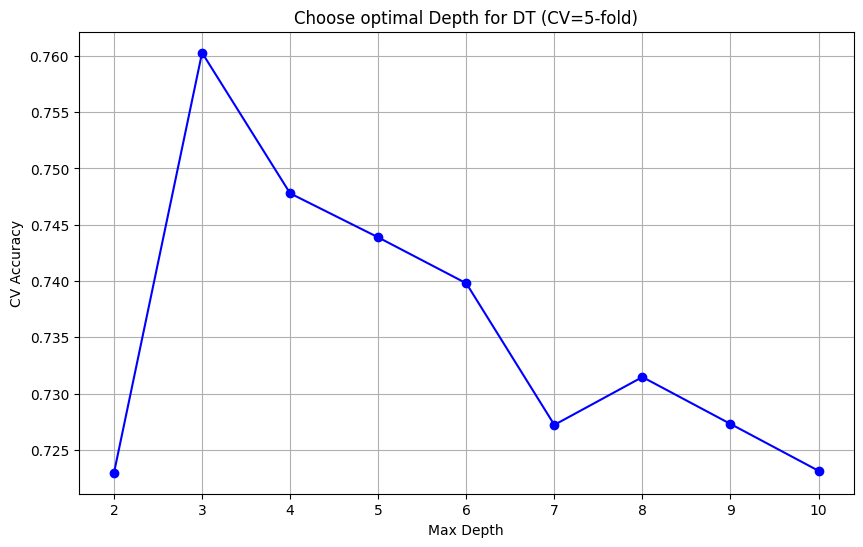

Optimal Depth: 3 with CV Accuracy: 0.7603
Validation Accuracy with optimal depth: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Test Accuracy of Decision Tree: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31


Feature Importance Ranking:


,feature,importance
0,thal_3.0,0.535670
2,cp_4.0,0.193685
3,ca_0.0,0.168378
6,oldpeak,0.066697
11,hr_ratio,0.035570
4,exang_1.0,0.000000
1,thal_7.0,0.000000
7,slope_1.0,0.000000
5,exang_0.0,0.000000
8,chol,0.000000


In [30]:
depth_optimal = find_optimal_depth(X_train_fe, y_train_fe)
model_fe, accuracy_fe = evaluate_val(X_train_fe, y_train_fe, X_val_fe, y_val_fe, depth_optimal)
test_accuracy_fe = evaluate_test(model_fe, X_test_fe, y_test_fe)
display_feature_importance(model_fe, X_train_fe)

## 4.Result Visualization

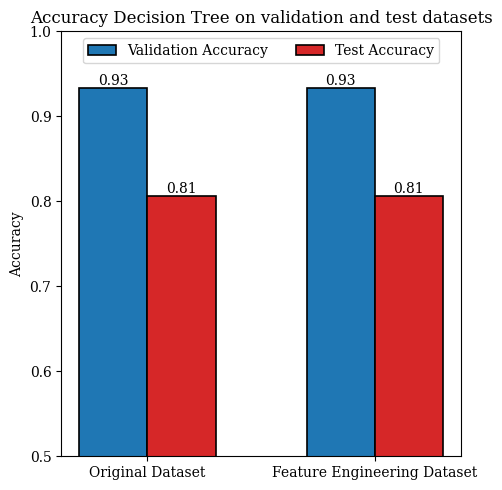

In [31]:
plt.rcParams['font.family'] = 'DejaVu Serif'

labels = ['Original Dataset', 'Feature Engineering Dataset']
val_accs  = [accuracy, accuracy_fe]
test_accs = [test_accuracy, test_accuracy_fe]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs,  width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.0)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Decision Tree on validation and test datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc="upper center")

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig("DT_accuracy_comparison.png", dpi=300, bbox_inches="tight")
fig.savefig("DT_accuracy_comparison.pdf", bbox_inches="tight")
plt.show()
